In [1]:
#6.3Fashion MNIST with CNN
#6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_X,train_y),(test_X,test_y) = fashion_mnist.load_data()

train_X = train_X/255.0
test_X = test_X/255.0

AttributeError: module 'keras' has no attribute 'datasets'

In [7]:
#reshape이전
print(train_X.shape,test_X.shape)
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
#reshape이후
print(train_X.shape,test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


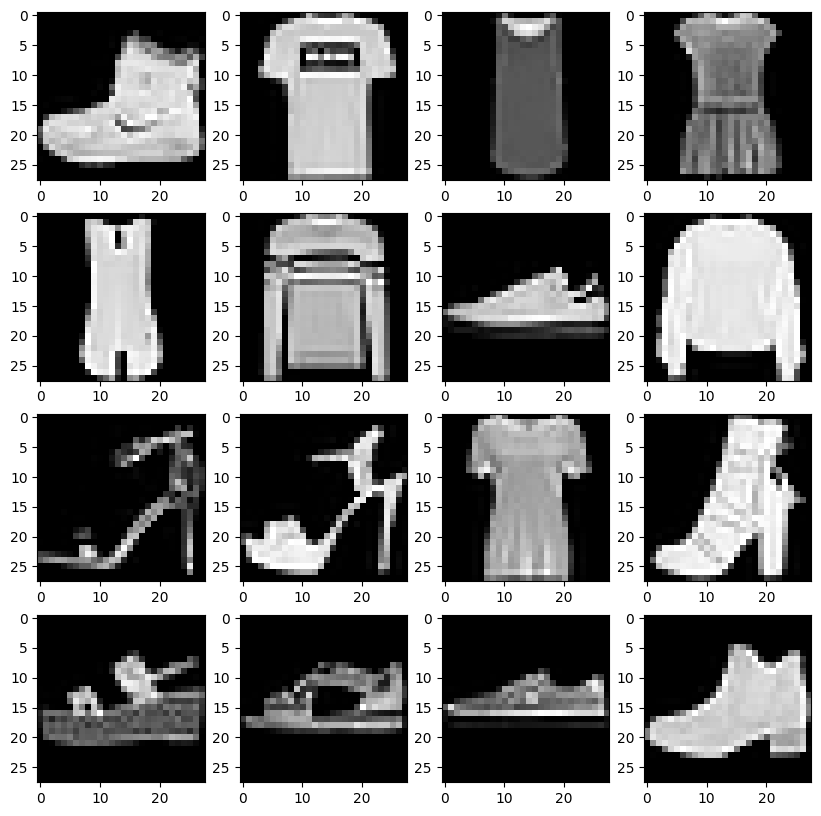

In [9]:
#6.6테이터 확인
import matplotlib.pyplot as plt
#전체 그래프의 사이즈를 width=10, height=10으로 지정합니다.
plt.figure(figsize=(10,10))
for c in range(16):
    #4행 4열로 지정한 grid에서 c+1 번째 칸에 그래프를 그립니다. 1~16
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28),cmap='gray')

In [10]:
#6.7Fashion MNIST 분류 컨블루션 신경망 모델 정의
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=[28,28,1],kernel_size=(3,3),filters=16),
    keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3989642 (15.22 MB)
Trainable params: 39896

In [11]:
#6.9 Fashion MNist 분류 컨블루션
history = model.fit(train_X,train_y,epochs=25,validation_split=0.25)


Epoch 1/25
1407/1407 [==============================] - 58s 41ms/step - loss: 0.4598 - accuracy: 0.8364 - val_loss: 0.4398 - val_accuracy: 0.8426
Epoch 2/25
1407/1407 [==============================] - 51s 36ms/step - loss: 0.3364 - accuracy: 0.8769 - val_loss: 0.3788 - val_accuracy: 0.8643
Epoch 3/25
1407/1407 [==============================] - 58s 41ms/step - loss: 0.2806 - accuracy: 0.8978 - val_loss: 0.3760 - val_accuracy: 0.8667
Epoch 4/25
1407/1407 [==============================] - 62s 44ms/step - loss: 0.2428 - accuracy: 0.9098 - val_loss: 0.3792 - val_accuracy: 0.8755
Epoch 5/25
1407/1407 [==============================] - 62s 44ms/step - loss: 0.2058 - accuracy: 0.9236 - val_loss: 0.4408 - val_accuracy: 0.8631
Epoch 6/25
1407/1407 [==============================] - 57s 40ms/step - loss: 0.1805 - accuracy: 0.9321 - val_loss: 0.4546 - val_accuracy: 0.8725
Epoch 7/25
1407/1407 [==============================] - 52s 37ms/step - loss: 0.1619 - accuracy: 0.9403 - val_loss: 0.5248 -

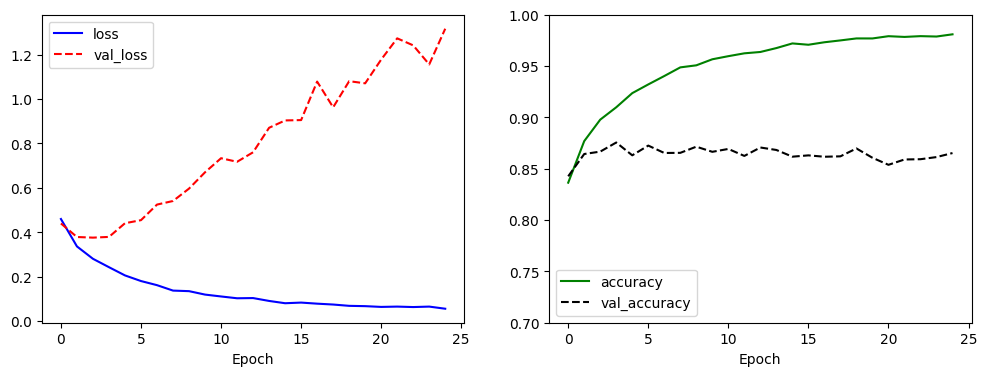

In [12]:
import matplotlib.pylab as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()


In [13]:
model.evaluate(test_X,test_y)

313/313 [==============================] - 2s 6ms/step - loss: 1.4085 - accuracy: 0.8602


[1.4084672927856445, 0.8601999878883362]

In [ ]:
#6.10 Fashion MNiST 분류 컨블루션 신경망 모델 정의 풀링
model = keras.Sequential([
    keras.layers.Conv2D(input_shape=[28,28,1],kernel_size=(3,3),filters=32),
    keras.layers.MaxPool2D(strides=(2,2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    keras.layers.MaxPool2D(strides=(2,2)),
    keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(rate=0.3),
    keras.layers.Dense(units=10,activation='softmax')
])
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
import matplotlib.pylab as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()